In [3]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import text
from config import password
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np


In [4]:
engine = create_engine(f'postgresql://{password}@localhost:5432/EmployeeSQL')
conn = engine.connect()
results = conn.execute(text("select salary, emp_no from salaries;")) 
salaries = pd.DataFrame(results, columns=['salary','employees'])
salaries.describe()

,salary,employees
count,300024.000000,300024.000000
mean,52970.732451,253321.763392
std,14301.478491,161828.235540
min,40000.000000,10001.000000
25%,40000.000000,85006.750000
50%,48681.000000,249987.500000
75%,61758.000000,424993.250000
max,129492.000000,499999.000000


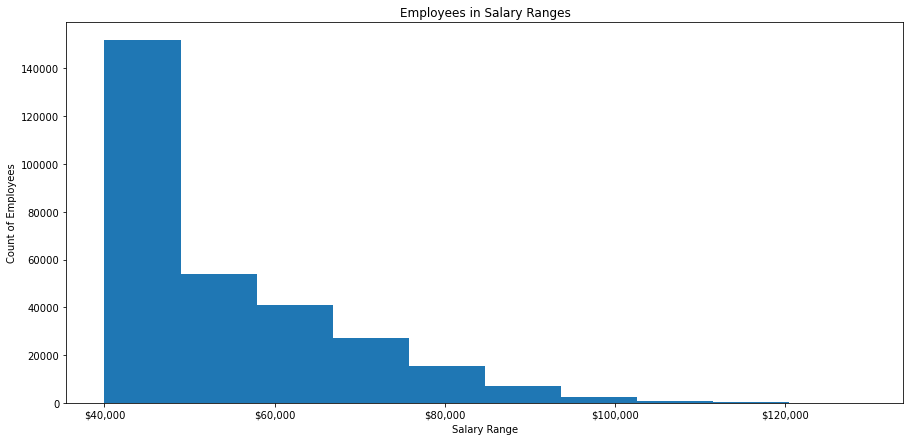

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
plt.hist(salaries['salary'])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
plt.title("Employees in Salary Ranges")
plt.xlabel("Salary Range")
plt.ylabel("Count of Employees")
plt.show()